# Titanic Data Survival Prediction using a Multilayer Perceptron

## Importing the necessary modules:

In [367]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers, Model
import matplotlib.pyplot as plt

## Reading the Data:

In [368]:
# Reading the data
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

## Exploring the data:

In [369]:
print(f'train columns = {train.columns},\n test columns = {test.columns}')


train columns = Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object'),
 test columns = Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [370]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [371]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Finding the Missing Values:

In [372]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [373]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [374]:
# the functions isna() and isnull() are virtually the same
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Let's See What the Data Split is:

In [375]:
train_shape = train.shape
train_shape = train_shape[0]
test_shape = test.shape 
test_shape = test_shape[0]
print(f'training data = {train_shape/(train_shape+test_shape)}')
print(f'testing data = {test_shape/(train_shape+test_shape)}')

training data = 0.680672268907563
testing data = 0.31932773109243695


## Cleaning the Data:

In [376]:
train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)
test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

In [377]:
print(f' columns of train = {train.columns} \n')
print(f' columns of test = {test.columns} \n')

# Identify train categorical columns
train_categorical_columns = train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'train categorical = {train_categorical_columns}')

# Identify test categorical columns
test_categorical_columns = test.select_dtypes(include = ['object', 'category']).columns.tolist()

print(f'test categorical = {test_categorical_columns}')

 columns of train = Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object') 

 columns of test = Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object') 

train categorical = ['Sex', 'Embarked']
test categorical = ['Sex', 'Embarked']


## One-hot Encoding Categorical Variables:

In [378]:
for col in test_categorical_columns:
    one_hot = pd.get_dummies(test[col], prefix = col)
    test = test.drop(col, axis = 1)
    test = pd.concat([test, one_hot], axis = 1)

In [379]:
# Loop through each categorical column and one-hot encode
for col in train_categorical_columns:
    # Get one-hot encoded columns
    one_hot = pd.get_dummies(train[col], prefix=col)
    # Drop the original column from the DataFrame
    train = train.drop(col, axis=1)
    # Concatenate the new one-hot encoded columns to the DataFrame
    train = pd.concat([train, one_hot], axis=1)

In [380]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,True,False,False,False,True
888,0,3,NaN,1,2,23.4500,True,False,False,False,True
889,1,1,26.0,0,0,30.0000,False,True,True,False,False


In [381]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False,True,False
1,3,47.0,1,0,7.0000,True,False,False,False,True
2,2,62.0,0,0,9.6875,False,True,False,True,False
3,3,27.0,0,0,8.6625,False,True,False,False,True
4,3,22.0,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,False,True,False,False,True
414,1,39.0,0,0,108.9000,True,False,True,False,False
415,3,38.5,0,0,7.2500,False,True,False,False,True
416,3,NaN,0,0,8.0500,False,True,False,False,True


In [382]:
print(f'{train.isnull().sum()} \n')
print(f'{test.isna().sum()}')

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64 

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [383]:
train.dropna(inplace = True)
test.dropna(inplace = True)

In [384]:
print(f'{test.isna().sum()} \n')
print(f'{train.isna().sum()}')

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64 

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [385]:
print(f'{train.shape}')
print(f'{test.shape}')

(714, 11)
(331, 10)


## Some Exploratory Statistics and Visualizations:

In [386]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

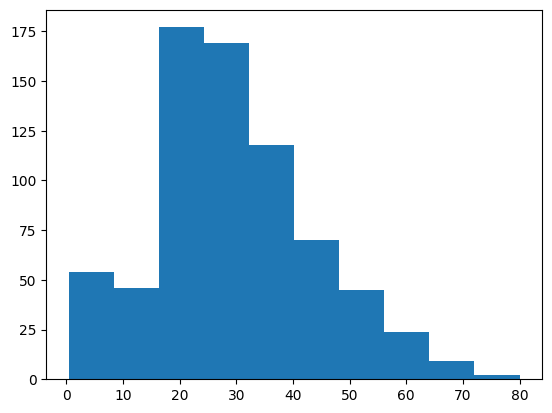

In [387]:
plt.hist(train["Age"])
plt.show()

## Defining the Model using Sequential API from Tensorflow:

In [388]:
# Defining the model

model = keras.Sequential()
model.add(layers.Dense(128,name = "1st_Dense_Layer-Input_Layer", activation = 'relu', input_shape = (train.shape[1] - 1,)))
model.add(layers.Dropout(0.2, name = "1st_Dropout_Layer"))

model.add(layers.Dense(128, name = "2nd_Dense_Layer",activation = 'relu'))
model.add(layers.Dropout(0.2, name = "2nd_Dropout_Layer"))

model.add(layers.Dense(128, name = "3rd_Dense_Layer",activation = 'relu'))
model.add(layers.Dropout(0.2, name = "3rd_Dropout_Layer"))

model.add(layers.Dense(128, name = "4th_Dense_Layer",activation = 'relu'))
model.add(layers.Dropout(0.2, name = "4th_Dropout_Layer"))

model.add(layers.Dense(1, name = "Sigmoid_Layer", activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Inspecting the Model Architecture:

In [389]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 1st_Dense_Layer-Input_Layer     │ (None, 128)            │         1,408 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 1st_Dropout_Layer (Dropout)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_Dense_Layer (Dense)         │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_Dropout_Layer (Dropout)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 3rd_Dense_Layer (Dense)         │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 3rd_Dropout_Layer (Dropout)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 4th_Dense_Layer (Dense)         │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 4th_Dropout_Layer (Dropout)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Sigmoid_Layer (Dense)           │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,073 (199.50 KB)

 Trainable params: 51,073 (199.50 KB)

 Non-trainable params: 0 (0.00 B)

## Let's consider the architecture in detail: 
* 128 neurons * 10 features + 128 biases = 1408 parameters for the 1st layer
* 128 output dimension * 128 neurons + 128 biases = 16,512 parameters for the 2,3,4 layers
* 128 output dimension * 1 neuron + 1 bias = 129 parameters for the final layer

## Model Graph:

In [390]:
from keras.utils import plot_model

In [391]:
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', metrics = ['accuracy'])

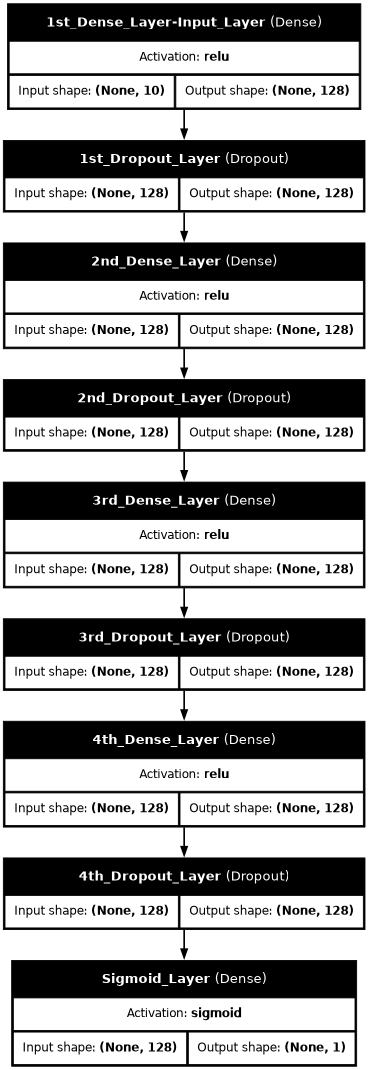

In [392]:
plot_model(model, show_shapes = True, 
           show_layer_names=True, show_layer_activations= True, dpi = 60 )

## Splitting the Labels from the Samples:

In [393]:
y_train = train['Survived']

In [394]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [395]:
x_train = train.iloc[:,1:]

In [396]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,True,False,False,True,False
886,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False


In [397]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False,True,False
1,3,47.0,1,0,7.0000,True,False,False,False,True
2,2,62.0,0,0,9.6875,False,True,False,True,False
3,3,27.0,0,0,8.6625,False,True,False,False,True
4,3,22.0,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
409,3,3.0,1,1,13.7750,True,False,False,False,True
411,1,37.0,1,0,90.0000,True,False,False,True,False
412,3,28.0,0,0,7.7750,True,False,False,False,True
414,1,39.0,0,0,108.9000,True,False,True,False,False


## Training and Evaluating the Model:

In [398]:
model.fit(x_train, y_train, epochs = 100, batch_size=16, validation_split = 0.2)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5870 - loss: 1.0838 - val_accuracy: 0.7343 - val_loss: 0.5651
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5413 - loss: 0.8816 - val_accuracy: 0.6434 - val_loss: 0.5940
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6345 - loss: 0.7601 - val_accuracy: 0.7063 - val_loss: 0.5526
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6700 - loss: 0.6555 - val_accuracy: 0.6713 - val_loss: 0.5925
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6331 - loss: 0.7220 - val_accuracy: 0.6434 - val_loss: 0.6153
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6046 - loss: 0.6994 - val_accuracy: 0.7273 - val_loss: 0.5598
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6039 - loss: 0.7216 - val_accuracy: 0.7133 - val_loss: 0.5305
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6532 - loss: 0.6635 - val_accuracy: 0.7203 - v

## Using the Model for Prediction:

In [399]:
predictions = model.predict(test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [400]:
for prediction in predictions:
    if prediction[0]>0.5:
        print(f'Prediction: {prediction[0].round()} = Survived')
    else:
        print(f'Prediction: {prediction[0].round()} = Did not survive')

Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 1.0 = Survived
Prediction: 0.0 = Did not survive
Prediction: 1.0 = Survived
Prediction: 0.0 = Did not survive
Prediction: 1.0 = Survived
Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 1.0 = Survived
Prediction: 0.0 = Did not survive
Prediction: 1.0 = Survived
Prediction: 1.0 = Survived
Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 1.0 = Survived
Prediction: 0.0 = Did not survive
Prediction: 1.0 = Survived
Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 0.0 = Did not survive
Prediction: 1.0 = Survived
Prediction: 0.0 = Did not survive
Predictio